# 6. NumPy modules

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
A = np.mat('0 1 2; 1 0 3; 4 -3 8')
A

matrix([[ 0,  1,  2],
        [ 1,  0,  3],
        [ 4, -3,  8]])

In [4]:
inverse = np.linalg.inv(A)
inverse

matrix([[-4.5,  7. , -1.5],
        [-2. ,  4. , -1. ],
        [ 1.5, -2. ,  0.5]])

In [5]:
A * inverse

matrix([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

## 6.4 求解線性方程組

In [6]:
A = np.mat('1 -2 1; 0 2 -8; -4 5 9')
A

matrix([[ 1, -2,  1],
        [ 0,  2, -8],
        [-4,  5,  9]])

In [7]:
b = np.array([0, 8, -9])
b

array([ 0,  8, -9])

In [8]:
# Ax = b
x = np.linalg.solve(A, b)
x

array([ 29.,  16.,   3.])

In [9]:
np.dot(A, x)

matrix([[ 0.,  8., -9.]])

## 6.6 Eigenvalue, Eigenvector

In [10]:
A = np.mat('3 -2; 1 0')
A

matrix([[ 3, -2],
        [ 1,  0]])

In [11]:
eigenvalues = np.linalg.eigvals(A)
eigenvalues

array([ 2.,  1.])

In [12]:
eigenvalues, eigenvectors = np.linalg.eig(A)
eigenvalues

array([ 2.,  1.])

In [13]:
eigenvectors

matrix([[ 0.89442719,  0.70710678],
        [ 0.4472136 ,  0.70710678]])

In [14]:
eigenvectors[:,0]

matrix([[ 0.89442719],
        [ 0.4472136 ]])

In [15]:
for i in  range(len(eigenvalues)):
    print('left {} == right {}'.format(np.dot(A, eigenvectors[:,i]), eigenvalues[i] * eigenvectors[:, i]))

left [[ 1.78885438]
 [ 0.89442719]] == right [[ 1.78885438]
 [ 0.89442719]]
left [[ 0.70710678]
 [ 0.70710678]] == right [[ 0.70710678]
 [ 0.70710678]]


## 6.8 SVD (Singular Value Decomposition, 奇異值分解)

In [16]:
A = np.mat('4 11 14; 8 7 -2')
A

matrix([[ 4, 11, 14],
        [ 8,  7, -2]])

In [17]:
U, Sigma, V = np.linalg.svd(A, full_matrices=False)

In [18]:
U

matrix([[-0.9486833 , -0.31622777],
        [-0.31622777,  0.9486833 ]])

In [19]:
Sigma

array([ 18.97366596,   9.48683298])

In [20]:
np.diag(Sigma)

array([[ 18.97366596,   0.        ],
       [  0.        ,   9.48683298]])

In [21]:
V

matrix([[-0.33333333, -0.66666667, -0.66666667],
        [ 0.66666667,  0.33333333, -0.66666667]])

In [22]:
U * np.diag(Sigma) * V

matrix([[  4.,  11.,  14.],
        [  8.,   7.,  -2.]])

## 6.10 計算 廣義逆矩陣 (Moore-Penrose pseudoinverse)

In [23]:
A = np.mat('4 11 14; 8 7 -2')
A

matrix([[ 4, 11, 14],
        [ 8,  7, -2]])

In [24]:
pseudoinv = np.linalg.pinv(A)
pseudoinv

matrix([[-0.00555556,  0.07222222],
        [ 0.02222222,  0.04444444],
        [ 0.05555556, -0.05555556]])

In [25]:
A * pseudoinv

matrix([[  1.00000000e+00,  -5.55111512e-16],
        [  0.00000000e+00,   1.00000000e+00]])

## 6.12 行列式 (determinant)

In [26]:
A = np.mat('3 4; 5 6')
A

matrix([[3, 4],
        [5, 6]])

In [27]:
np.linalg.det(A)

-2.0000000000000013

## 6.14 快速傅立葉變換 (FFT, Fast Fourier Transform)

In [28]:
x = np.linspace(0, 2 * np.pi, 30) 

In [29]:
wave = np.cos(x)

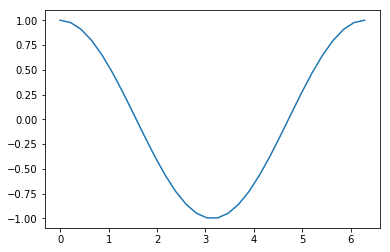

In [30]:
plot(x, wave)
show()

In [31]:
transformed = np.fft.fft(wave)

/home/wei/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


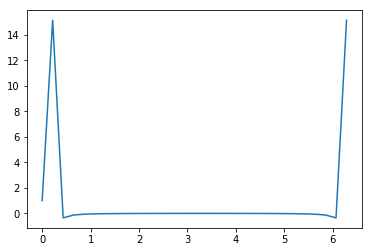

In [32]:
plot(x, transformed)
show()

In [33]:
np.all(np.abs(np.fft.ifft(transformed) - wave) < 10**-9)

True

## 6.16 移頻

In [34]:
x = np.linspace(0, 2 * np.pi, 30)

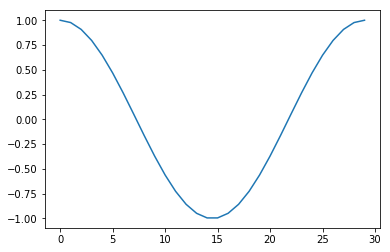

In [35]:
wave = np.cos(x)
plot(wave) 
show()

In [36]:
transformed = np.fft.fft(wave)

/home/wei/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


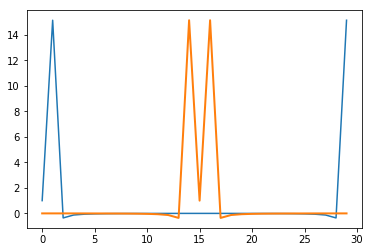

In [37]:
shifted = np.fft.fftshift(transformed) 
plot(transformed)
plot(shifted, lw = 2)
show()

In [38]:
np.all(np.fft.ifftshift(shifted) - transformed < 10 ** -9)

True

## 6.17 隨機數

## 6.18 Binomial

In [39]:
cash = np.zeros(10000)
cash[0] = 1000
outcome = np.random.binomial(9, 0.5, size = len(cash))
outcome

array([6, 4, 4, ..., 6, 4, 5])

In [40]:
print(outcome.min(), outcome.max())

0 9


In [41]:
for i in range(1, len(cash)):
    if outcome[i] < 5:
        cash[i] = cash[i - 1] - 1
    elif outcome[i] < 10:
        cash[i] = cash[i - 1] + 1
    else:
        raise AssertionError('Unexpected outcome' + outcome[i])

In [42]:
cash[-1]

951.0

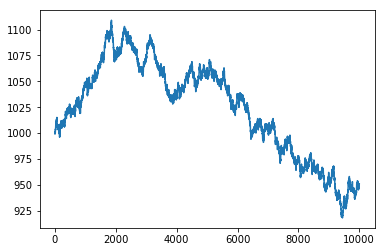

In [43]:
plot(cash)
show()

## 6.19 超幾何分佈 (Hypergeometric distribution)

In [44]:
points = np.zeros(100)
outcomes = np.random.hypergeometric(25, 1, 3, size = len(points))
outcomes

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3,
       3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3])

In [45]:
for i in range(len(points)):
    if outcome[i] == 3:
        points[i] = points[i - 1] + 1
    elif outcomes[i] == 2:
        points[i] = points[i - 1] - 6
    else:
        pass
#         print(outcomes[i])

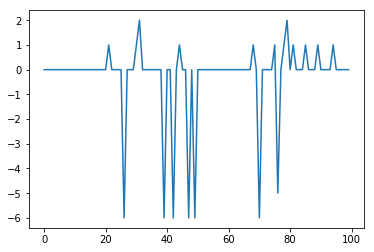

In [46]:
plot(points)
show()

## 6.21 連續分佈

## 6.22 常態分佈 (Guass distribution)

In [47]:
N = 10000
normal_values = np.random.normal(size = N)

/home/wei/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/home/wei/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


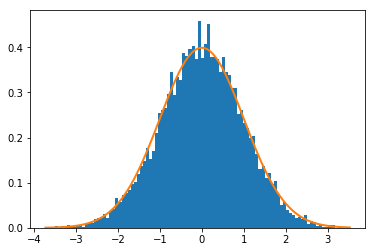

In [48]:
dummy, bins, _ = plt.hist(normal_values, np.sqrt(N), normed = True, lw = 1)
sigma = 1
mu = 0
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu) ** 2 / (2 * sigma**2)), lw = 2)

## 6.24 對數常態分佈 (Lognormal distribution)

In [49]:
N = 10000
lognormal_values = np.random.lognormal(size = N)

/home/wei/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/home/wei/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


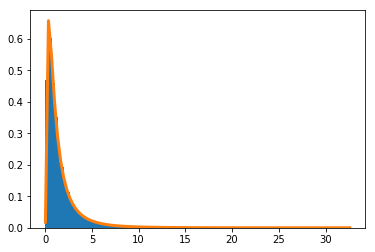

In [50]:
dummy, bins, _ = plt.hist(lognormal_values, np.sqrt(N), normed = True, lw = 1)
sigma = 1
mu = 0
x = np.linspace(min(bins), max(bins), len(bins))
pdf = np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi))
plt.plot(x, pdf, lw = 3)
plt.show() 